<a href="https://colab.research.google.com/github/Daniblue25/diabete-deploy/blob/main/Interpretation%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report


In [31]:
df=pd.read_csv("data01.csv")

In [32]:
df.head()

group      ID  outcome  age  gendera        BMI  hypertensive  \
0      1  125047      0.0   72        1  37.588179             0   
1      1  139812      0.0   75        2        NaN             0   
2      1  109787      0.0   83        2  26.572634             0   
3      1  130587      0.0   43        2  83.264629             0   
4      1  138290      0.0   75        2  31.824842             1   

   atrialfibrillation  CHD with no MI  diabetes  ...  Blood sodium  \
0                   0               0         1  ...    138.750000   
1                   0               0         0  ...    138.888889   
2                   0               0         0  ...    140.714286   
3                   0               0         0  ...    138.500000   
4                   0               0         0  ...    136.666667   

   Blood calcium    Chloride  Anion gap  Magnesium ion     PH  Bicarbonate  \
0       7.463636  109.166667  13.166667       2.618182  7.230    21.166667   
1       8.162500   98.444444  11.444444       1.887500  7.225    33.444444   
2       8.266667  105.857143  10.000000       2.157143  7.268    30.571429   
3       9.476923   92.071429  12.357143       1.942857  7.370    38.571429   
4       8.733333  104.500000  15.166667       1.650000  7.250    22.000000   

   Lactic acid  PCO2  EF  
0          0.5  40.0  55  
1          0.5  78.0  55  
2          0.5  71.5  35  
3          0.6  75.0  55  
4          0.6  50.0  55  

[5 rows x 51 columns]

In [33]:
df.columns

Index(['group', 'ID', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF'],
      dtype='object')

In [56]:
fo = ['age', 'BMI', 'hypertensive',
       'deficiencyanemias', 'Renal failure','Systolic blood pressure', 'PH', 'temperature', 'SP O2', 'Urine output', 'Creatinine', 'diabetes']
diabete = df[fo]

In [57]:
# Affichage des informations générales sur le DataFrame
diabete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1177 non-null   int64  
 1   BMI                      962 non-null    float64
 2   hypertensive             1177 non-null   int64  
 3   deficiencyanemias        1177 non-null   int64  
 4   Renal failure            1177 non-null   int64  
 5   Systolic blood pressure  1161 non-null   float64
 6   PH                       885 non-null    float64
 7   temperature              1158 non-null   float64
 8   SP O2                    1164 non-null   float64
 9   Urine output             1141 non-null   float64
 10  Creatinine               1177 non-null   float64
 11  diabetes                 1177 non-null   int64  
dtypes: float64(7), int64(5)
memory usage: 110.5 KB


In [58]:
# Affichage des statistiques descriptives du DataFrame
diabete.describe()

age         BMI  hypertensive  deficiencyanemias  \
count  1177.000000  962.000000   1177.000000        1177.000000   
mean     74.055225   30.188278      0.717927           0.338997   
std      13.434061    9.325997      0.450200           0.473570   
min      19.000000   13.346801      0.000000           0.000000   
25%      65.000000   24.326461      0.000000           0.000000   
50%      77.000000   28.312474      1.000000           0.000000   
75%      85.000000   33.633509      1.000000           1.000000   
max      99.000000  104.970366      1.000000           1.000000   

       Renal failure  Systolic blood pressure          PH  temperature  \
count    1177.000000              1161.000000  885.000000  1158.000000   
mean        0.365336               117.995035    7.378532    36.677286   
std         0.481729                17.367618    0.067320     0.607558   
min         0.000000                75.000000    7.090000    33.250000   
25%         0.000000               105.391304    7.334615    36.286045   
50%         0.000000               116.128205    7.380000    36.650794   
75%         1.000000               128.625000    7.430000    37.021991   
max         1.000000               203.000000    7.580000    39.132478   

             SP O2  Urine output   Creatinine     diabetes  
count  1164.000000   1141.000000  1177.000000  1177.000000  
mean     96.272900   1899.276512     1.642846     0.421410  
std       2.298002   1272.363631     1.279651     0.493995  
min      75.916667      0.000000     0.266667     0.000000  
25%      95.000000    980.000000     0.940000     0.000000  
50%      96.452273   1675.000000     1.287500     0.000000  
75%      97.917500   2500.000000     1.900000     1.000000  
max     100.000000   8820.000000    15.527273     1.000000

In [59]:
diabete.isnull().sum()

age                          0
BMI                        215
hypertensive                 0
deficiencyanemias            0
Renal failure                0
Systolic blood pressure     16
PH                         292
temperature                 19
SP O2                       13
Urine output                36
Creatinine                   0
diabetes                     0
dtype: int64

In [60]:
diabete = diabete.fillna(diabete.min())

In [61]:
# Affichage du nombre de valeurs uniques pour chaque variable
print(diabete.nunique())

age                          68
BMI                         933
hypertensive                  2
deficiencyanemias             2
Renal failure                 2
Systolic blood pressure    1102
PH                          413
temperature                 775
SP O2                       866
Urine output                810
Creatinine                  729
diabetes                      2
dtype: int64


In [62]:
y = diabete['diabetes']
x = diabete.drop('diabetes', axis= 1)
print(y.shape)
print(x.shape)

(1177,)
(1177, 11)


In [43]:
# Determination des variables pertinentes
from sklearn.preprocessing import StandardScaler

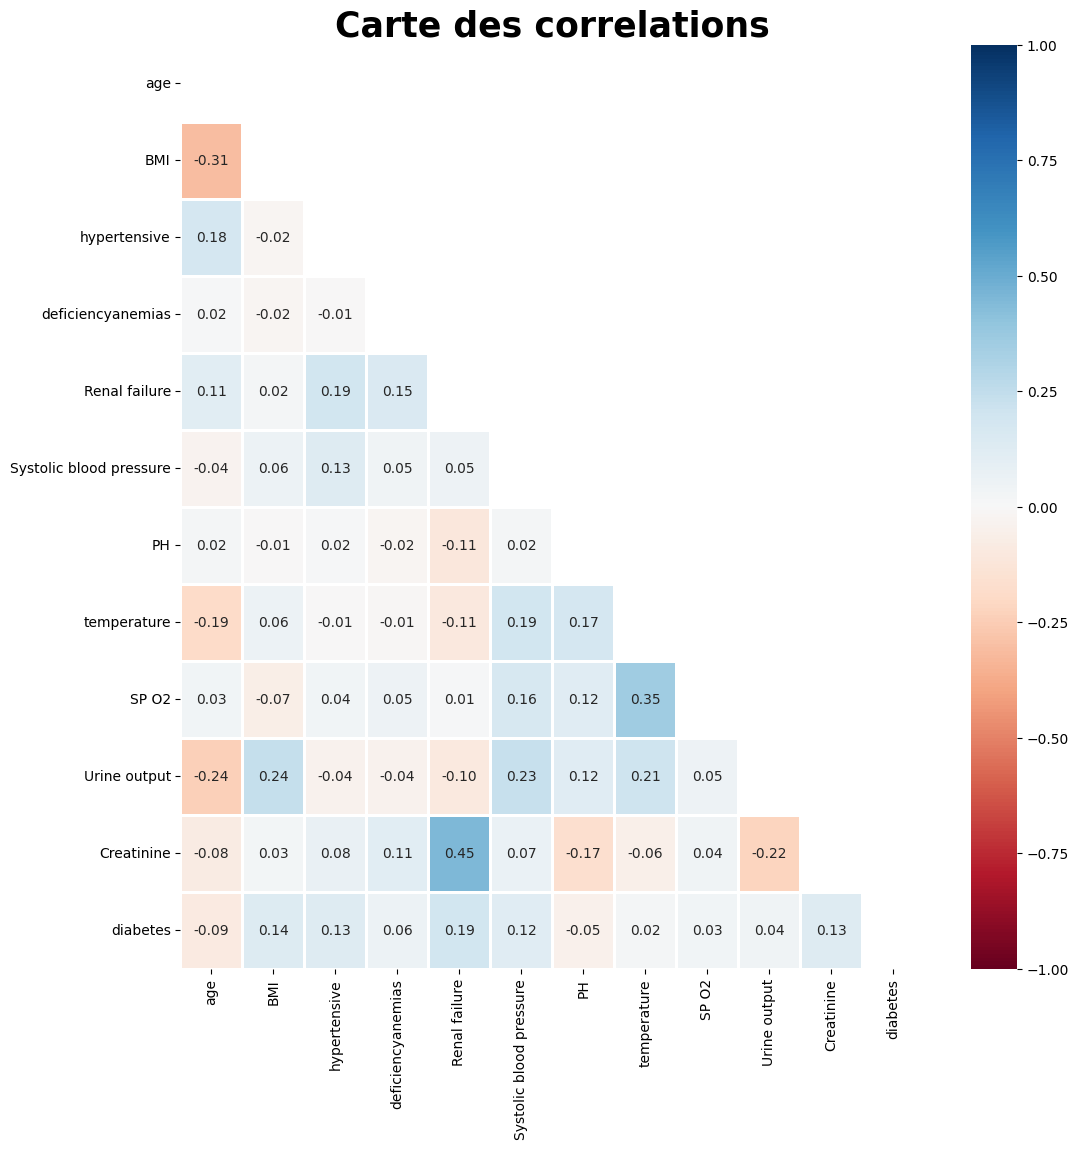

In [63]:
mask = np.triu(np.ones_like(diabete.corr(), dtype = bool)) # pour masquer la 2ème partie du tableau
plt.figure(figsize=(12,12))
sns.heatmap(diabete.corr(), mask=mask, center= 0, cmap= 'RdBu', linewidths=1, annot=True, fmt= ".2f", vmin=-1, vmax=1)
plt.title('Carte des correlations', fontsize =25, fontweight= "bold")
plt.show()

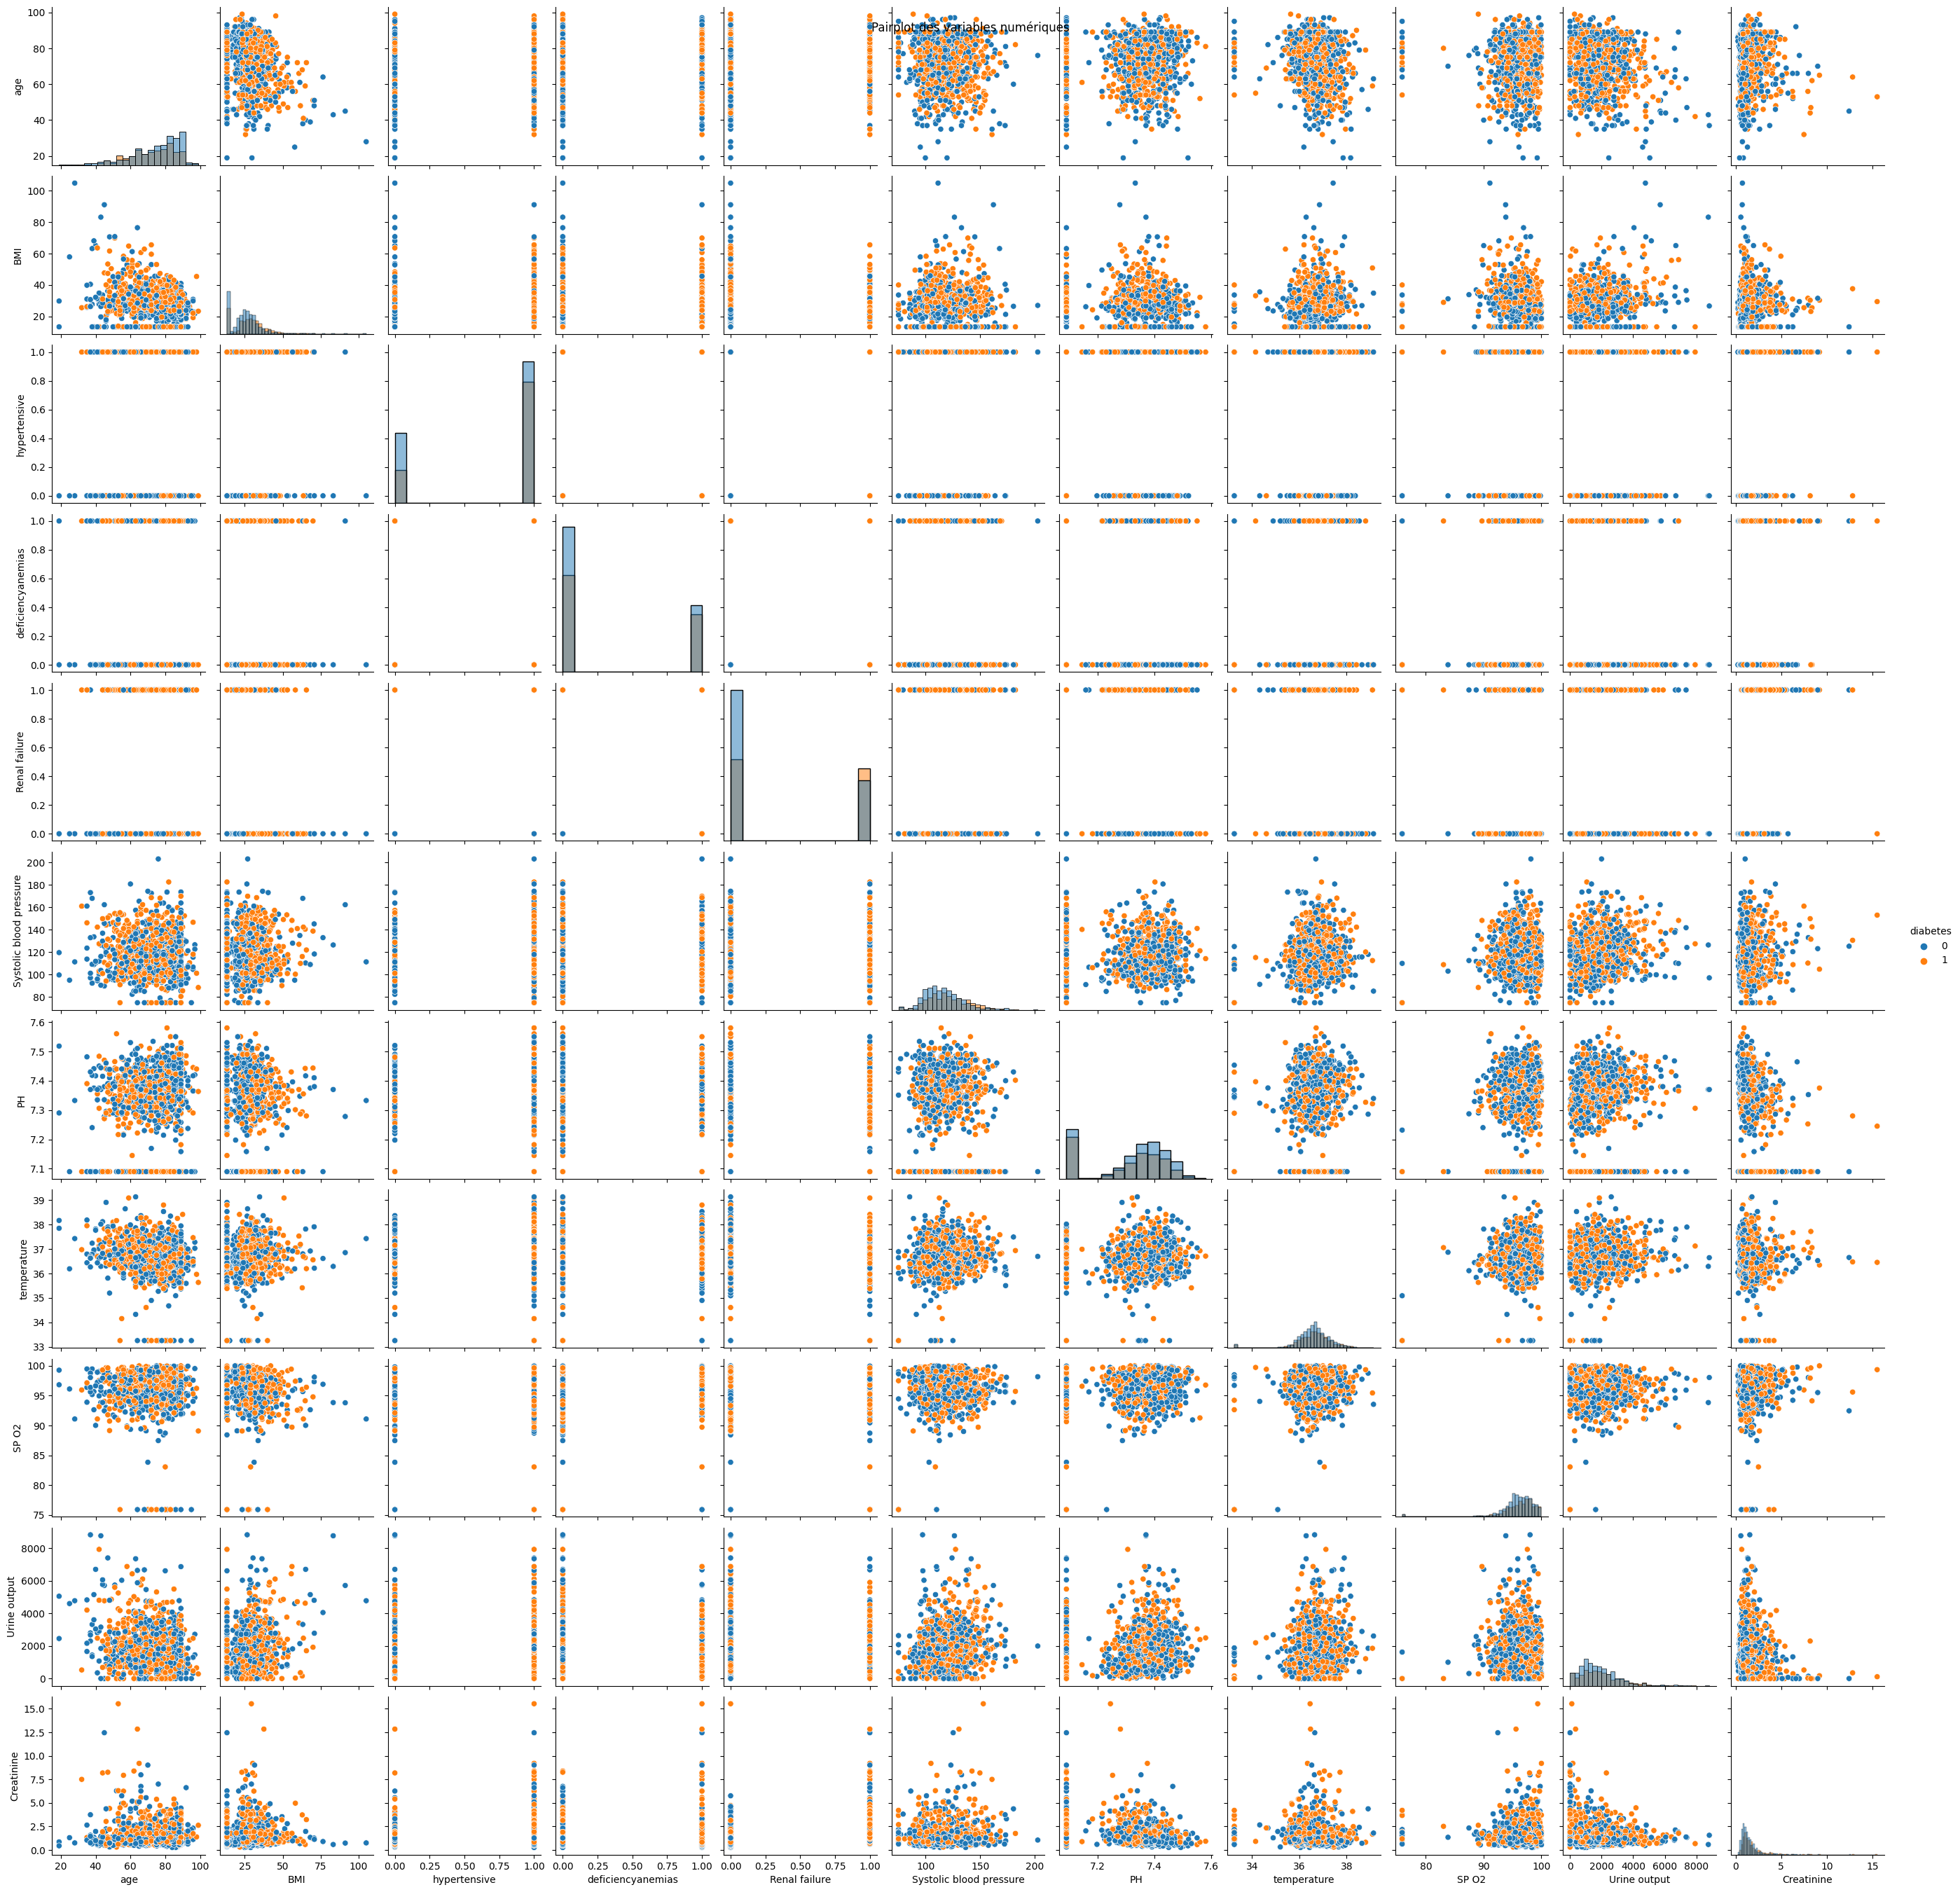

In [64]:
# Génération du pairplot
sns.pairplot(data=diabete, hue='diabetes', diag_kind='hist')
plt.suptitle('Pairplot des variables numériques')
plt.show()

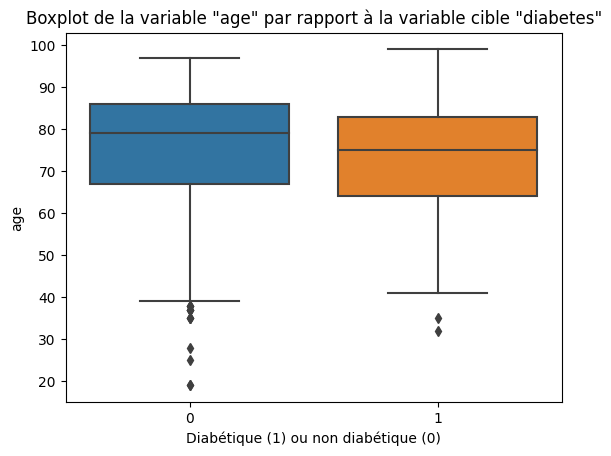

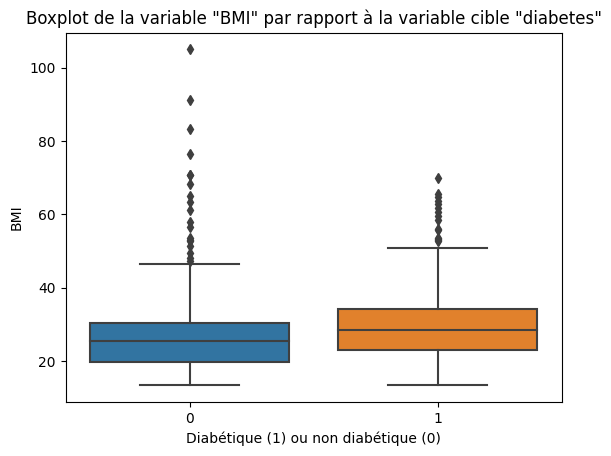

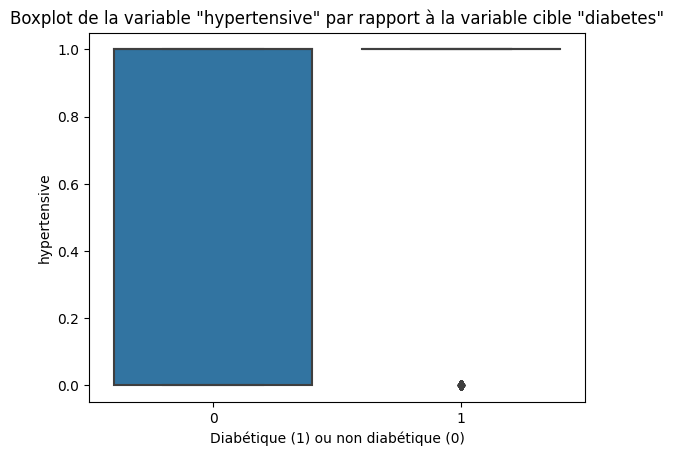

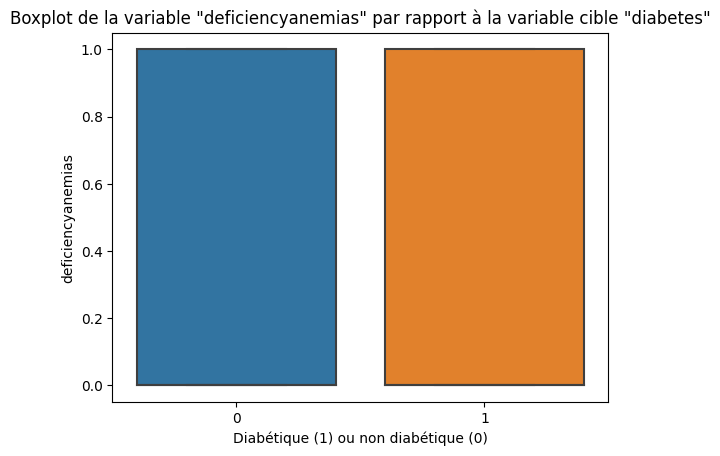

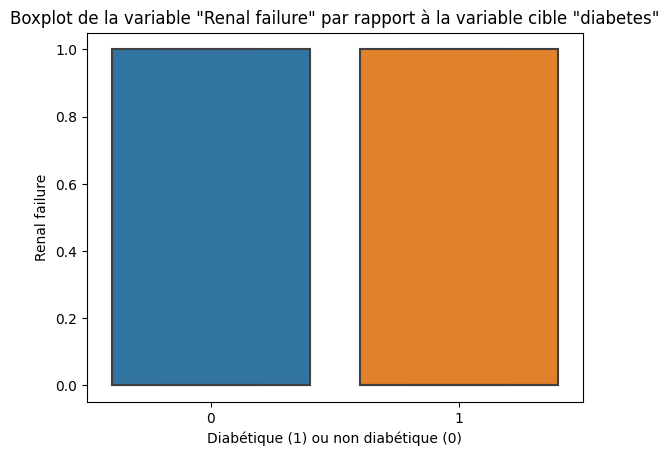

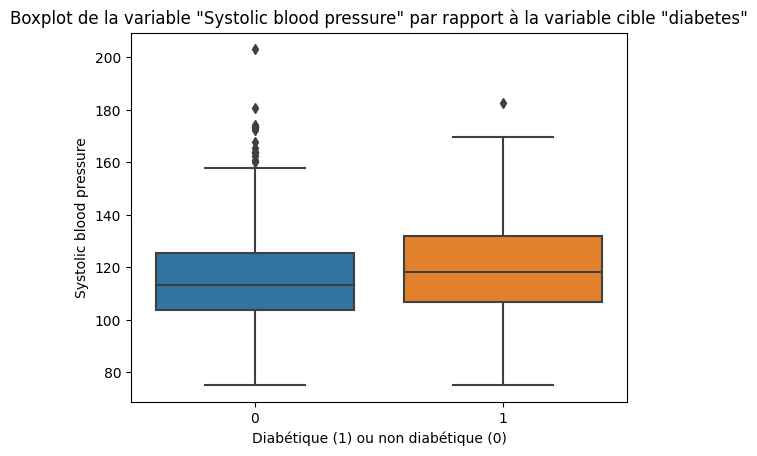

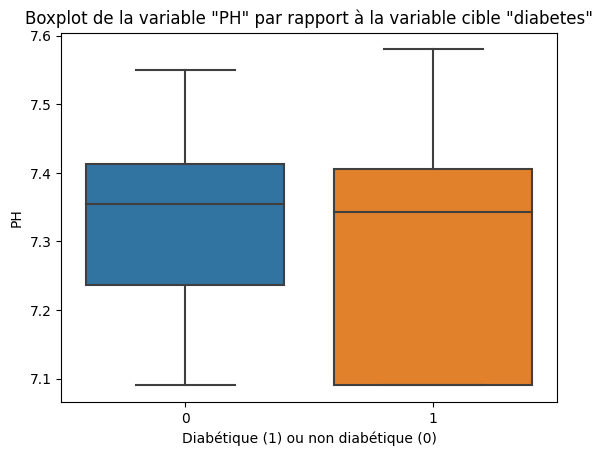

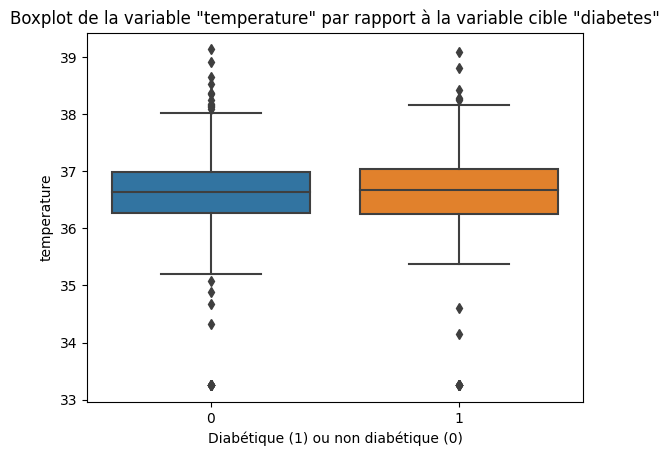

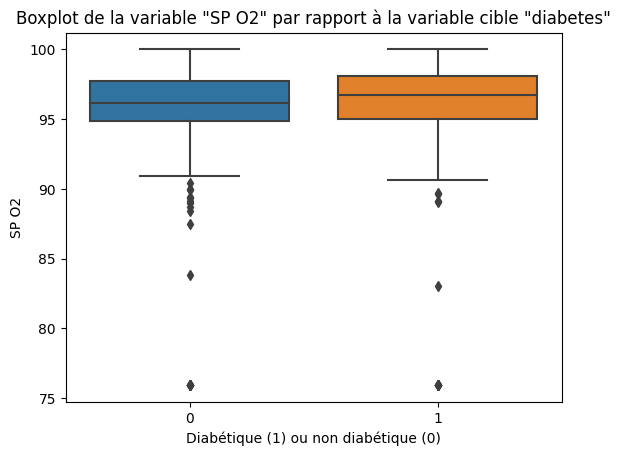

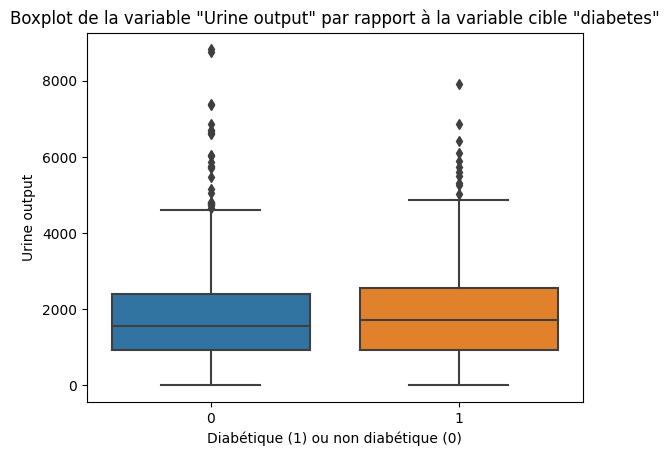

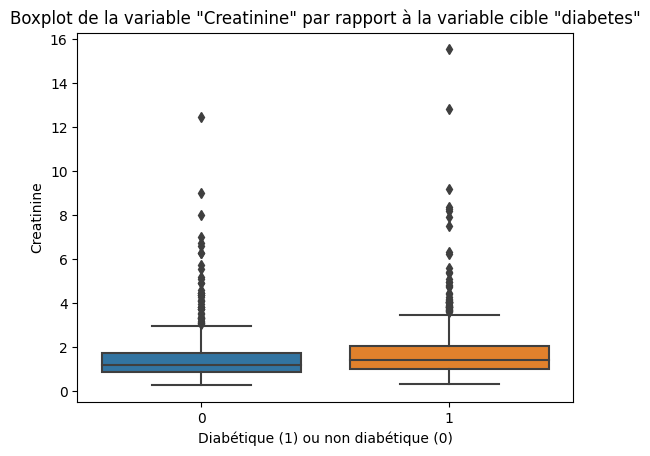

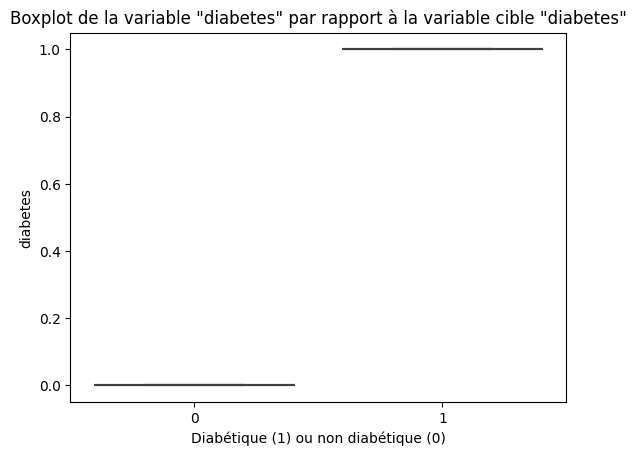

In [65]:
# Génération des boxplots bivariés pour chaque variable numérique sur des graphiques séparés
for col in fo:
    sns.boxplot(data=diabete, x='diabetes', y=col)
    plt.title(f'Boxplot de la variable "{col}" par rapport à la variable cible "diabetes"')
    plt.xlabel('Diabétique (1) ou non diabétique (0)')
    plt.ylabel(col)
    plt.show()

In [66]:
# Calcul des statistiques de test de Kruskal-Wallis et des p-valeurs pour chaque variable numérique
num_vars = fo

from scipy.stats import kruskal
p_values = []
for col in num_vars:
    h, pval = kruskal(diabete[col][diabete['diabetes']==0], diabete[col][diabete['diabetes']==1])
    p_values.append(pval)

    # Création d'une liste pour stocker les valeurs de significativité
is_significant = []

# Vérification de la significativité pour chaque p-valeur et stockage dans la liste is_significant
for pval in p_values:
    if pval < 0.05:
        is_significant.append('Oui')
    else:
        is_significant.append('Non')

# Affichage des résultats dans un tableau
result_table = pd.DataFrame({'Variable': num_vars, 'P-value': p_values, 'Significative': is_significant})
result_table.set_index('Variable', inplace=True)
print(result_table)

                               P-value Significative
Variable                                            
age                       2.626705e-05           Oui
BMI                       2.651646e-09           Oui
hypertensive              8.746670e-06           Oui
deficiencyanemias         3.561951e-02           Oui
Renal failure             9.850923e-11           Oui
Systolic blood pressure   4.206515e-06           Oui
PH                        8.052023e-02           Non
temperature               2.724782e-01           Non
SP O2                     1.310064e-02           Oui
Urine output              1.062367e-01           Non
Creatinine                3.503387e-08           Oui
diabetes                 1.002796e-257           Oui


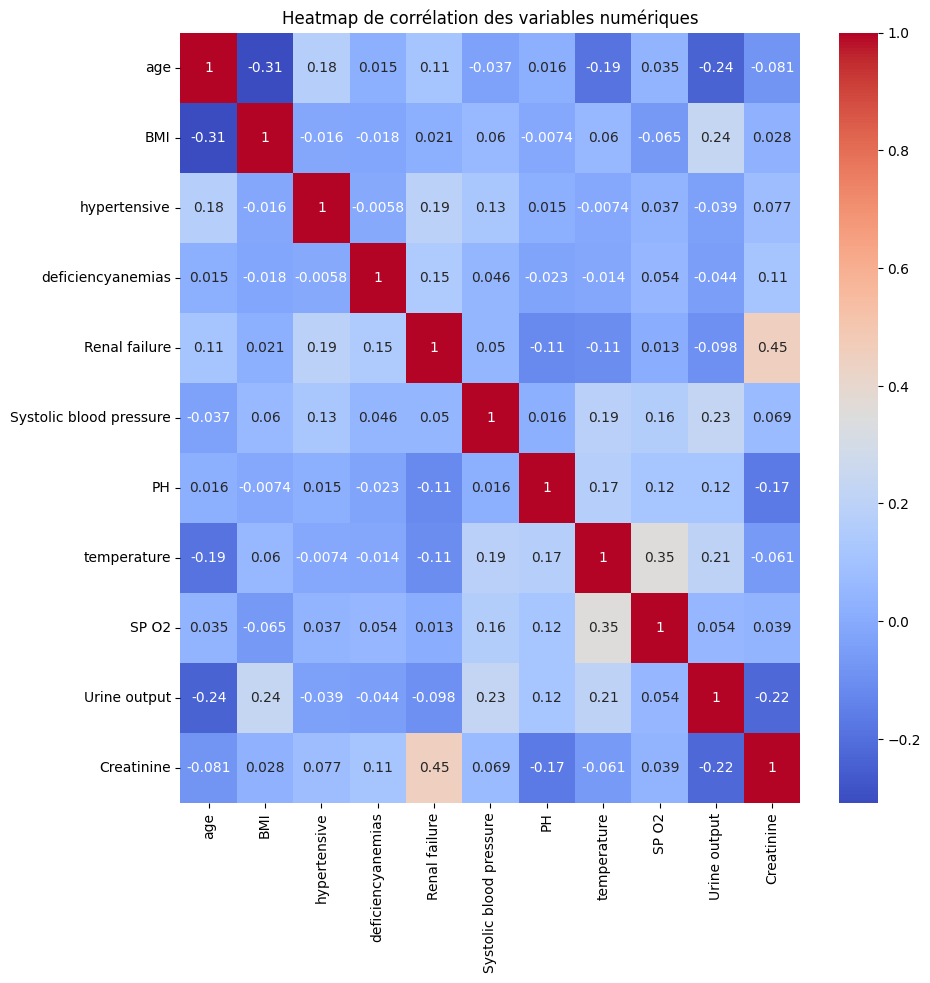

In [69]:
# Sélection des variables numériques
num_vars = ['age', 'BMI', 'hypertensive', 'deficiencyanemias', 'Renal failure', 'Systolic blood pressure', 'PH', 'temperature', 'SP O2', 'Urine output', 'Creatinine',]
df_num = diabete[num_vars]

# Génération de la heatmap de corrélation
plt.figure(figsize=(10,10))
sns.heatmap(df_num.corr(), cmap='coolwarm', annot=True)
plt.title('Heatmap de corrélation des variables numériques')
plt.show()

In [73]:
# XGBoost
# Division des données en ensemble d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [71]:
from xgboost import XGBClassifier

In [72]:
# XGBoost avec optimisation des paramètresr avec GridSearchCV
from sklearn.model_selection import  GridSearchCV
import time

In [74]:
# Définition des paramètres à optimiser
param_grid = {

    # max_depth est la profondeur maximale de chaque arbre. Une valeur plus élevée rendra le modèle plus complexe et pourrait entraîner un surapprentissage.
    'max_depth': [3, 4, 5,7,8],

    # learning_rate (ou taux d'apprentissage) est le pas d'ajustement effectué à chaque étape de l'optimisation. Une valeur plus faible rendra l'apprentissage plus lent.
    'learning_rate': [0.001, 0.01, 0.1, 0.2],

    # n_estimators est le nombre d'arbres à construire.
    'n_estimators': [100, 200, 300,500,600,1000]

}

# Création de l'objet GridSearch

model = XGBClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=2)

In [75]:
# Enregistrement du temps actuel
start_time = time.time()

# Entraînement du modèle avec GridSearch
grid_search.fit(X_train, y_train)

# Calcul du temps d'exécution
execution_time = time.time() - start_time

Fitting 5 folds for each of 120 candidates, totalling 600 fits


In [76]:
# Affichage des meilleurs paramètres
print("Best parameters found: ", grid_search.best_params_)

# Affichage du temps d'exécution
print("Temps d'exécution: %.2f secondes" % execution_time)

Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
Temps d'exécution: 384.67 secondes


In [77]:
# Utilisation du meilleur modèle trouvé pour la prédiction
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [78]:
# Classification Report
print("\nTrain Classification Report:")
print(classification_report(y_train, y_train_pred))



Train Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       548
           1       0.83      0.58      0.68       393

    accuracy                           0.77       941
   macro avg       0.79      0.74      0.75       941
weighted avg       0.78      0.77      0.76       941



In [79]:
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))


Test Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.87      0.75       133
           1       0.72      0.42      0.53       103

    accuracy                           0.67       236
   macro avg       0.69      0.64      0.64       236
weighted avg       0.68      0.67      0.65       236



In [81]:
from sklearn.metrics import roc_curve,auc
# Courbe ROC pour le jeu de données test
# Courbe ROC
y_train_pred_prob = best_model.predict_proba(X_train)[:,1]
y_test_pred_prob = best_model.predict_proba(X_test)[:,1]

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Courbe ROC pour le jeu de données d'entraînement
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
roc_auc_train = auc(fpr_train, tpr_train)

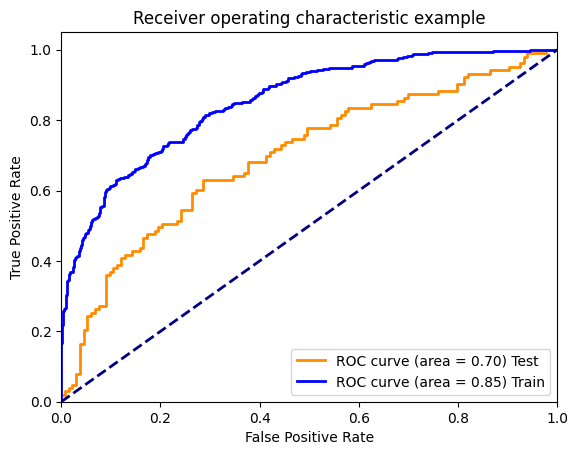

In [82]:
# Affichage des courbes ROC
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f) Test' % roc_auc_test)
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve (area = %0.2f) Train' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [84]:
# Importance des variables
importance_scores = best_model.feature_importances_

# Création du DataFrame d'importance des variables
importance_df = pd.DataFrame({
    'feature': x.columns,
    'importance': importance_scores
}).sort_values(by='importance', ascending=False)

# Affichage du DataFrame d'importance des variables
print(importance_df)

                    feature  importance
4             Renal failure    0.191946
1                       BMI    0.117826
5   Systolic blood pressure    0.106082
10               Creatinine    0.083486
0                       age    0.082999
7               temperature    0.075999
8                     SP O2    0.072292
3         deficiencyanemias    0.070495
2              hypertensive    0.070068
9              Urine output    0.069009
6                        PH    0.059798


In [86]:
import lime
from lime import lime_tabular

# Création de l'explainer
explainer = lime_tabular.LimeTabularExplainer(X_train.values,
                                              feature_names=X_train.columns.values.tolist(),
                                              class_names=['0','1'],
                                              verbose=True,
                                              mode='classification')

# Choisissez un exemple spécifique à expliquer
i = 3
exp = explainer.explain_instance(X_test.values[i], best_model.predict_proba, num_features=5)

# Afficher l'explication
exp.show_in_notebook(show_table=True)

Intercept 0.45584720426686587
Prediction_local [0.50133285]
Right: 0.2962132


In [89]:
import shap
# Initialisation du Javascript
shap.initjs()

# Création de l'explainer
explainer = shap.TreeExplainer(grid_search.best_estimator_)

# Calcul des valeurs SHAP pour les instances de test
shap_values = explainer.shap_values(X_test)

# Choisissez un exemple spécifique à expliquer
i = 3  # vous pouvez choisir l'indice de l'exemple que vous souhaitez expliquer
shap.force_plot(explainer.expected_value, shap_values[i,:], X_test.iloc[i,:])

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


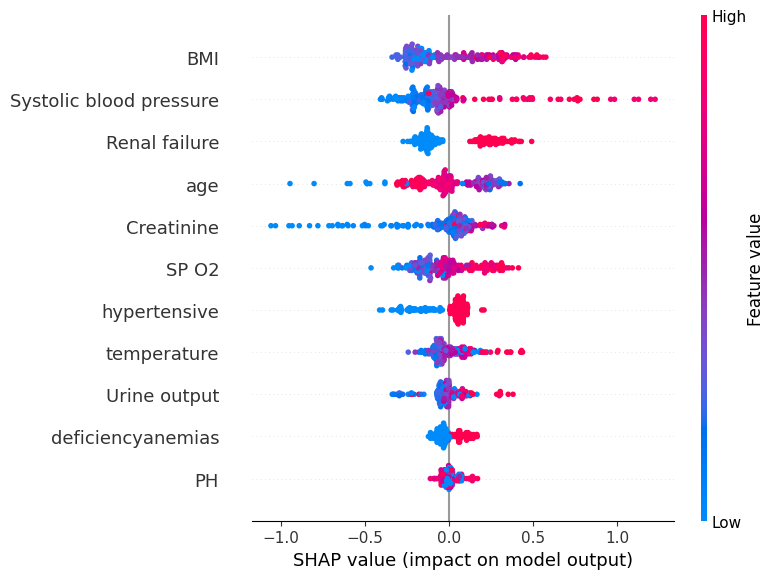

In [90]:
# Graphique SHAP résumé pour l'interprétabilité globale
shap.summary_plot(shap_values, X_test)

In [92]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(best_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())